<a href="https://colab.research.google.com/github/Big-Shu-Nim/NLP/blob/main/%ED%8A%B8%EB%9E%9C%EC%8A%A4%ED%8F%AC%EB%A8%B8_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 분류 


## 목표
"This roof!! Love at every sight!"
와 같이 문장의 감정상태를 식별하고자함
사용모델 :DistilBERT 
  * Bert만큼의 성능을 보여주며 훨씬 사이즈가 작고 효율적 
  

트랜스포머 모델 훈련하는 파이프라인
1. 데이터셋 로드하고 전처리
2. 입력 텍스트를 토큰화 
3. 모델을 로드, 훈련, 추론하기
4. 측정 도구를 로드하고 모델을 평가하기

# 2.1 데이터셋
* 영어로 작성된 트위터 메시지에 감정이 어떻게 표현되는지 연구한 논문 사용
* 분노, 혐오, 두려움, 기쁨, 슬픔, 놀람 여섯개의 감정이 존재
* 출처: "DistilBERT, a Distilled Version of BERT: smaller, Faster, Cheaper and Lighter"(https://arxiv.org/abs/1910.01108) 2019

#2.1.1 허깅페이스 데이터셋 처음 사용하기


In [ ]:
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 22.9 MB/s eta 0:00:00


In [ ]:
# 허브에 있는 데이터셋 확인하기
from datasets import list_datasets

all_datasets = list_datasets()
print(f"현재 허브에는 {len(all_datasets)}개의 데이터셋이 있습니다.")
print(f"처음 10개 데이터셋: {all_datasets[:10]}")

현재 허브에는 39088개의 데이터셋이 있습니다.
처음 10개 데이터셋: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [ ]:
# emotion 데이터 로드하기
from datasets import load_dataset

emotions= load_dataset('emotion')
emotions
# 본 객체는 딕셔너리와 유사
# 각 키는 다른 분할에 상응
# 일반적인 딕셔너리 사용법으로 개별 분할을  참조 할수 있습니다.

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_ds = emotions['train']
train_ds

# Dataset 클래스 객체를 반환함
# 평범한 파이썬 배열이나 리스트처럼 작동하게 됨

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
# 길이 확인
len(train_ds)

16000

In [ ]:
# 인덱스로 개별 샘플확인
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
#칼럼이름 확인
train_ds.column_names

['text', 'label']

In [ ]:
# 사용중인 객체의 feature 속성확인하기
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [ ]:
# text여의 데이터 타입은 string이고, label 열은 클래스 이름과 정수 매핑에 대한
# 정보가 담긴 특별한 classlabel 객체
# 슬라이스 연산자를 이ㅛㅇㅇ해 몇개의 행을 선택 
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


In [ ]:
print(train_ds['text'][:5])
# 다음과 같이 수행할 경우
# 딕셔너리 값이 개별 항목이 되지 않고 리스트로 묶임
# 이름으로 특정 열 지정 가능


['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


# 2.1.2 데이터셋에서 데이터프레임으로

* 현재 데이터로더를 사용해온 텍스트 데이터는 저수준으로 기능으로 구현 가능
* 판다스를 활용한다면 고수준 데이터 시각화 API 사용 가능하기에 전환이 유리

In [ ]:
import pandas as pd
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()
#내부 데이터 포맷은 바꾸지 않음 

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


* 레이블이 정수로 출력되므로 
* features 속성으로 label 열을 선택한 후 int2str()메서드로
* "레이블 이름'에 해당하는 새로운 열을 추가

In [ ]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


# 2.1.3 클래스 분포 살펴보기 


* 텍스트 분류 문제를 다룰 때는 
* 언제나 샘플의 클래스 분포를 조사하는것이 좋습니다.
* 클래스분포가 편향된 데이터셋은
* 훈련손실과 평가 지표 측면에서 
* 균형잡힌 데이터셋과 다른 처리법이 필요합니다. 


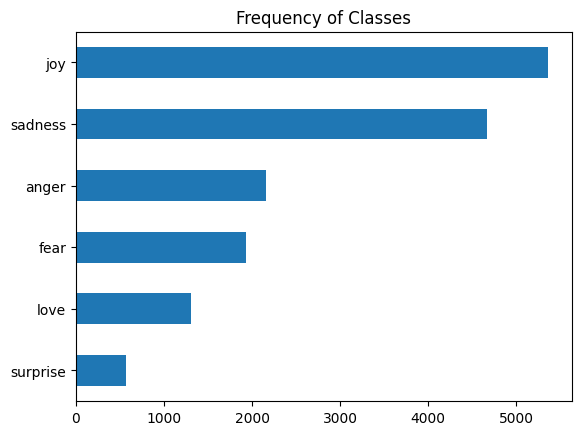

In [ ]:
import matplotlib.pyplot as plt

df['label_name'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

* 불균형이 심합니다.
* joy & sadness 클래스가 많이 등장하고 
* love& Surprise 클래스는 5-10배나 적습니다.


## 불균형 데이터 핸들링 방법
1. 소수 클래스를 랜덤하게 오버샘플링합니다.(oversampling)
2. 다수 클래스를 랜덤하게 언더샘플링합니다.(undersampling)
3. 클래스의 대표성이 부족하다면 레이블된 데이터를 더 많이 수집합니다. 


## 샘플링 전략 팁
1. 훈련/테스트 분할을 하기 전에는 샘플링 전략을 사용하지 않는다.
2. 샘플링 전략은 일반적으로 훈련데이터에만 적용한다.
* 하지만 이번 분석에서는 분석의 단순화를 위해서 불균형 클래스분포를 그대로 안고감

# 2.1.4 트윗 길이 확인

* 트래스포머 모델은 최대 문맥크기(maximum context size)라는 최대 입력 시퀀스 길이가 있습니다.
* DistillBERT를 사용하는 애플리케이션에서 최대문맥 크기는 512토큰 정도로 문단 몇개 정도 입니다.
* 토큰은 텍스트 기본 단위 입니다.
* 본 분석에서는 토큰을 단어로 간주하겠습니다.
* 트윗당 단어 분포를 부면 감정에 따른 트윗 길이가 대략 추정됩니다.



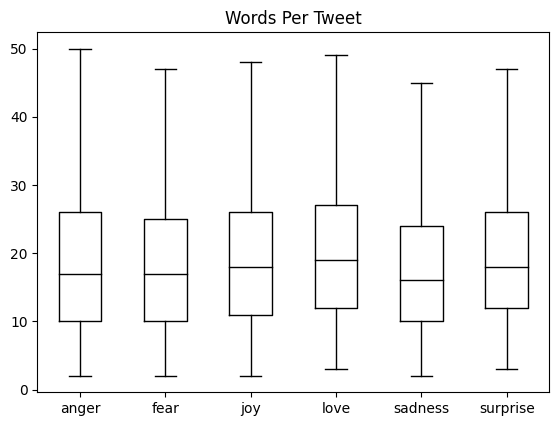

In [ ]:
#단어길이 카운트
df['Words Per Tweet']=df['text'].str.split().apply(len)
df.boxplot('Words Per Tweet', by='label_name', grid=False,
           showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

'Words Per Tweet' : 이 매개변수는 플롯에 사용될 DataFrame의 열 이름을 지정합니다. 이 경우, 'Words Per Tweet'라는 이름의 열을 사용하여 박스 플롯을 그립니다.

by='label_name' : 이는 'label_name' 열의 고유한 값에 따라 별도의 박스 플롯을 생성하라는 의미입니다. 즉, 'label_name'의 각 값에 대해 'Words Per Tweet'의 분포를 보여주는 별도의 박스 플롯을 생성합니다.

grid=False : 이는 그래프 배경의 격자 선(grid lines)을 표시하지 않도록 설정합니다.

showfliers=False : 박스 플롯에서 플라이어(fliers, 혹은 이상치)는 일반적인 데이터 범위에서 크게 벗어난 값을 나타냅니다. 이 매개변수를 False로 설정하면 이상치를 플롯에서 제외하게 됩니다.

color='black' : 이는 박스 플롯의 색상을 검은색으로 설정합니다.

따라서 이 코드는 'Words Per Tweet'의 분포를 'label_name' 값에 따라 별도로 그리는 박스 플롯을 생성하며, 이때 격자 선은 표시하지 않고, 이상치는 제외하며, 플롯의 색상은 검은색으로 설정하는 것입니다.

결과를 보면 각 트윗 길이는 15개정도 입니다.
가장 긴 트윗도 최대 문맥 크기 보다 작습니다.
모델의 문맥크기가 길면 잘라내야 하는데, 잘린 텍스트에 중요한 정보가 있을 경우
손실이 있을수 있습니다. 다행히 이경우에 이런 문제가 없습니다.

In [ ]:
# 데이터셋의 출력 포맷을 초기화
emotions.reset_format()

# 2.2 텍스트에서 토큰으로 

* DistilBERT 같은 트랜스포머 모델은 원시 문자열을 입력으로 받지 못합니다.
* 대신 텍스트가 토큰화되어 수치 백터로 인코딩됐다고 가정해보죠
* 토큰화는 문자열을 모델이 사용하는 기본단위로 분할하는 단계입니다. 
* 여기에는 몇가지 전략이 존재합니다.
* '문자 토큰화' '단어 토큰화' 라는 극단적인 방식을 살펴본 후
* DistillBert에서 사용하는 토크나이저에 대해 알아보죠

# 2.2.1 문자 토큰화


* 1 문자를 개별로 모델에 주입하기
* 파이선 str객체은 하나의 배열입니다. 따라서 손쉽게 구현됩니다.

In [ ]:
text = 'Tokenizing text is a core task of NLP.'
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


* 이 다음 모델은 각 문자가 정수로 변환된기를 기대합니다.
* 이런 과정을 수치화라고 합니다. (numericalization)
* 가장 손쉬운 방법은 고유한 각 토큰을 고유한 정수로 인코딩하는것입니다.



In [ ]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}



이 코드는 Python의 dictionary comprehension(딕셔너리 내포)를 사용하여 각 고유 토큰(token)에 대한 인덱스를 생성하는 역할을 합니다. 각 단계를 살펴보면 다음과 같습니다.

set(tokenized_text) : 이 부분은 텍스트를 토큰화한 결과인 tokenized_text를 set으로 변환합니다. Set 자료형은 중복을 허용하지 않기 때문에, 이 결과는 중복 없이 모든 고유 토큰을 포함하게 됩니다.

sorted(set(tokenized_text)) : set 자료형은 순서가 없기 때문에, 이를 sorted 함수를 사용하여 정렬합니다. 이 결과는 알파벳 순서대로 정렬된 고유 토큰의 리스트가 됩니다.

enumerate(sorted(set(tokenized_text))) : enumerate는 리스트의 각 원소에 대해 인덱스와 함께 반복하게 해주는 함수입니다. 이 함수를 사용하면, 각 고유 토큰에 대해 인덱스 (즉, 순서)와 함께 반복하게 됩니다.

{ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))} : 마지막으로, dictionary comprehension을 사용하여 각 토큰과 그에 대응하는 인덱스를 딕셔너리로 만듭니다. 이 딕셔너리는 각 토큰을 키로, 해당 토큰의 인덱스를 값으로 가집니다.

따라서, 이 코드의 결과는 각 고유 토큰에 대응하는 인덱스를 가지는 딕셔너리가 됩니다. 이 딕셔너리는 토큰을 그에 대응하는 인덱스로 변환하는 데 사용할 수 있습니다. 이는 종종 텍스트를 수치 데이터로 변환하는 데 사용되는 기법입니다.

* 이를 통해 어휘사전에 있는 각 문자를 고유한 정수로 바꾸는 매핑 딕셔너리를 만들겠습니다.
*  이제 toekn2idx를 사용해 토큰화된 텍스트를 정수 리스트로 반환합니다.

In [ ]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


* input_ids의 의미
* 이렇게 숫자로 변환된 데이터는 컴퓨터가 처리하기에 적합하며, 
* 특히 기계 학습 모델에 입력으로 사용하기에 이상적입니다. 
* 그래서 이름이 "input_ids"인 것입니다. 
* 각 토큰이 고유한 숫자 식별자로 매핑됐습니다.  
* 이는 달리 말하면 각 단어나 기호에 번호를 매겨서 컴퓨터가 알아볼 수 있게 만든 것을 말합니다.

* 마지막 단계로 input_ds를 원핫 백터의 2D 텐서로 바꿉니다. 
* 순서형 또는 명목형 범주 데이터를 인코딩하기 위해 사용됩니다.
* 다음 코드로 예를 보여드리겠습니다.

In [ ]:
categorical_df = pd.DataFrame(
    {'name': ['Bumblebee', 'Optimus Prime', 'Megatron'], 'Label ID':[0,1,2]}
)
categorical_df

,name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


* 이 방식은 가상의 순서가 만들어진다는 문제가 있습니다.
* 숫자 1,2 이렇게 커지는데 큰 숫자가 의미를 가지고 있는건 아니잖아요?
* 따라서 이 대신 범주마다 새 열을 만들어 이름 범주에 해당하면 1 아니면 
0를 할당합니다. 
* 본 역할을 판다스에서는 get_dummies()함수가 수행합니다.

In [ ]:
pd.get_dummies(categorical_df['name'])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


* 이렇게하면 원소 사이에 순서가 생기는 비슷한 문제 발생
* 그러나 두아이디를 더하거나 뺴도 아무런 의미가 없음


In [ ]:
#파이토치로 input_ids를 텐서로 바꾸고
# one_hot함수를 사용해 원핫인코딩을 만들기
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

* 38개의 입력 토큰 각각에 20차원의 원핫 백터가 만들어짐
* 20차원이는 고유한 문자의 갯수가 20개이기떄문

* one_hot()함수에 항상 num_classess 매개변수를 지정하는 것이 중요합니다.
* 그렇지 않으면 원핫백터가 어학사전 길이보다 짧아집니다.(수동으로해야함)  * 텐서플로에서 이와 동일한 함수는 tf.oee_hot()입니다


In [ ]:
print(f"토큰 : {tokenized_text[0]}")
print(f"텐서 인덱스 : {input_ids[0]}")
print(f"원-핫 인코딩: {one_hot_encodings[0]}")

토큰 : T
텐서 인덱스 : 5
원-핫 인코딩: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


문자 수준의 토큰화
* 텍스트의 구조를 무시하고 전체 문자열을 문사 스트림으로 처리
* 철자 오류나 희귀한 단어를 처리하는데 유용
* 단어 같은 언어구조를 이 데이터에서 학습해야 한다는 큰단점이 있습니다
* 상당량의 계산, 메모리, 데이터가 필요합니다. 
* 따라서 거의 사용되지 않습니다.
* 대신 텍스트의 일부구조가 유지되는 토큰화를 사용합니다
* 단어 토큰화는 토큰화를 하며 텍스트의 구조를 유지하는 간단한 방법입니다
* 알아보죠

#2.2.2 단어 토큰화


In [ ]:
# 공백을 사용한 토크나이저 --가장 간단
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


* 각 단어를 하나의 ID에 매핑합니다
* 이방식의 단점은 구두점이 고려되지 않는것이죠
* NLP.이 하나의 토큰으로 처리됩니다.
* 단어 곡용, 활용형, 철자 오류가 포함되어 어휘사전이 금세 수백만개로 늘어나기도합니다.

* 일부 단어 토크나이저는 구두점을 추가하는 규칙이 있습니다. 또 텍스트에서 일부 정보를 ㅇ릭는 대신 어간으로 정규화하는 어간추출(stem, stemming)이나 표제어 추출을 적용할수도 있습니다.(lemmatization) (great, greater, greatest -> great으로 추출)

# 단어 토크나이저의 단점
* 100만개의 고유단어 -> 100만개 * 1000차원 -> 10억개의 가중치
* 달리말하면 모델 파라미터가 낭비됨
* 이를 절출하는 방안으로 말뭉치를 제안(예:주로 10만개 이하)
* UNK토큰으로 분류해 버릴수도 있으나 정보를 잃음

# 2.2.3 부부단어 토큰화

In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.4 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


* AutoTokenizer 클래스
체크포인트 이름을 사용해 모델의 설정, 사전 훈련된 가중치 어휘사전을 자동으로 추출하는 자동 클래스 


In [ ]:
# 다음과 같이 수동으로 로드할수도 있다
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [ ]:
# 예제로 확인
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


* tokenzing, nlp가 두개의 토큰으로 나뉘었는데
* 이 경우 자주쓰는 단어가 아니기 때문입니다.
* ##izing은 앞의 문자열이 공백이 아님을 의미하며, 문자열로 다시바꿀때 자동으로 합쳐집니다


In [ ]:
# 이런작업을하는 매써드가 있는데 다음과 같습니다
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [ ]:
# AutoTokenzier는 정보를 제공하는 속성도 있음 다음과 같이 단어사전의 크기 알수 있음
tokenizer.vocab_size

30522

In [ ]:
# 최대문맥크기도 확인가능
tokenizer.model_max_length

512

In [ ]:
# foward pass에서 기대되는 필드 이름도 존재
tokenizer.model_input_names

['input_ids', 'attention_mask']

# 2.2.4 전체 데이터셋 토큰화하기


In [ ]:
def tokenzie(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)
# 본 함수는 토크나이저를 샘플배치에 적용
# padding=true의 경우 가장 긴 토큰의 길이에 맞춰 자동으로 패딩을 합니다
# truncation=true의 경우 모델이 이해할수있는 최대문맥에 맞춰 나머지를 잘라냅니다


In [ ]:
# 샘플문장 두개 보기
print(tokenzie(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


* 토크나이저는 인코딩된 트윗을 input_ids로 변환하고
* attetion_mask 배열 리스트도 반환합니다
* 이는 추가된 패딩 토큰 때문에 모델이 혼동하지 않게 하려는 조치입니다. 

In [ ]:
emotion_encoded = emotions.map(tokenzie, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

* 기본적으로 map() 매서드는 말뭉치에 있는 모든 샘플에 개벽적으로 적용
* batched=True 로 설정하여 트윗을 배치로 인코딩
* batch_size= None으로 설정했기 떄문에 전체 데이터셋이 하나의 배치로 
* tokenzie()함수에 적용됩니다. 
* 입력 텐서와 어텐션 마스크는 전역적으로 딩일한 크기로 생성됨
* 이 연산은 데이터셋에 input_ids와 attention_mask열을 새로 추가합니다

In [ ]:
print(emotion_encoded['train'].column_names)

['text', 'label', 'input_ids', 'attention_mask']


# 트랜스 포머 모델이 텍스트 분류 과정


먼저 텍스트를 토큰화해 토큰 인코딩이라 부르는 원-핫 백터로 나타냅니다. 토크나이저 어휘사전의 크기가 토큰 인코딩의 차원을 결정하는데, 어휘사전은 보통 2만~2백만개의 고유 토큰으로 구성됩니다. 그 다음 코튼 인코딩을 저차원 공간의 백터인 토큰 임배딩응로 변환됩니다. 그 다음 토큰 임베딩을 인코더 블록  층에 통과시켜 각 입력 토큰에 대한 은닉 상태를 만듭니다. 각 은닉 상태는 언어 모델링의 사전 훈련 목표를 달성하기 위해 마스킹된 입력 토큰을 예측하는 층으로 전달됩니다. 그리고 분류작업에서는 이 언어 모델링을 분류층으로 바꿉니다.

토큰화: 텍스트를 '토큰'이라는 작은 단위로 나누는 과정입니다. 예를 들어, "나는 오늘 학교에 갔다"라는 문장이 있으면, 이를 토큰화하면 "나는", "오늘", "학교에", "갔다"라는 토큰으로 나눌 수 있습니다.

토큰 인코딩: 토큰화한 텍스트를 컴퓨터가 이해할 수 있도록 숫자로 바꾸는 과정입니다. 보통 원-핫 벡터라는 방법을 사용하는데, 각 토큰을 어휘사전의 크기만큼의 차원을 가진 벡터로 표현합니다. 예를 들어, 어휘사전에 "나는", "오늘", "학교에", "갔다" 네 개의 단어가 있다면 "나는"은 [1, 0, 0, 0], "오늘"은 [0, 1, 0, 0] 같이 표현합니다.

토큰 임베딩: 토큰 인코딩된 벡터를 다시 저차원의 밀집 벡터로 변환하는 과정입니다. 이 과정을 거치면, 각 단어들 사이의 관계를 더 잘 표현할 수 있게 됩니다.

인코더 블록: 인코더 블록은 토큰 임베딩을 받아서 각 토큰에 대한 은닉 상태를 만들어냅니다. 이 은닉 상태는 각 단어의 주변 단어들을 고려한 정보를 담고 있습니다.

언어 모델링: 은닉 상태는 그 다음 언어 모델링의 목표를 달성하기 위해 사용됩니다. 언어 모델링에서는 주어진 단어들을 바탕으로 다음 단어를 예측하는 것이 목표입니다.

분류작업: 언어 모델링의 구조를 조금 바꿔서 문장이나 단어를 분류하는 문제를 풀 수 있습니다. 이 때 사용되는 것이 분류층입니다. 분류층은 모델의 마지막에 추가되어서, 문장이나 단어가 어떤 카테고리에 속하는지를 예측




토큰 인코딩은 우리가 앞서 언급한 원-핫 벡터 형식을 사용합니다. 원-핫 벡터는 단어 사전의 크기만큼의 차원을 가진 벡터로서, 표현하려는 단어에 해당하는 인덱스의 위치에 1을, 나머지 위치에는 0을 갖습니다. 이러한 원-핫 벡터는 고차원이며 대부분의 값이 0입니다. 이런 벡터를 '희소 벡터'라고 합니다.

하지만 이런 희소 벡터는 계산 비용이 많이 들고, 단어 사이의 유사도를 잘 표현하지 못하는 문제가 있습니다. 예를 들어, "개"와 "강아지"는 유사한 의미를 갖지만, 원-핫 인코딩에서는 두 단어가 전혀 다른 벡터로 표현됩니다.

이 문제를 해결하기 위해 "토큰 임베딩" 과정을 거칩니다. 이 과정에서는 원-핫 벡터를 저차원의 '밀집 벡터'로 변환합니다. 밀집 벡터는 대부분의 값이 0이 아니며, 각 차원이 어떤 의미를 갖게 됩니다. 예를 들어, 한 차원은 "동물"과 관련된 정보를, 다른 차원은 "크기"와 관련된 정보를 갖는 식입니다. 이런 방식으로 밀집 벡터는 단어 사이의 유사도를 잘 표현할 수 있게 됩니다.

또한, 원-핫 벡터에 비해 차원이 작기 때문에 계산 비용이 크게 줄어듭니다. 이 밀집 벡터를 "임베딩 벡터"라고 부르며, 이 벡터들이 모여 만들어진 공간을 "임베딩 공간"이라고 합니다. 이 임베딩 공간에서는 의미적으로 유사한 단어들이 서로 가까이 위치하게 됩니다.

* 트위터셋에서 언어모델 활용법
* 특성  추출
  - 사전 훈련된 모델을 수정하지 않고 은닉 상태를 특성으로 사용해 분류 모델을 훈련
* 미세 튜닝
  - 사전 훈련된 모델의 피라미터도 업데이트도 하기위해 전체 모델을 엔드 투 엔드로 훈련하는것

#2.3.1 트랜스포머를 특성 추출기로 사용하기 

* 모델의 파라미터 동결하고
* 은닉 상태를 분류모델의 특성으로 사용하는것
* 작거 얕은 모델을 빠르게 훈련함


## 사전 훈련된 모델 사용하기
AutoModel은
- 사전 훈련된 모델의 가중치를 로드하는 from_pretraiend()
- 이 미세드를 사용해 distilBert의 체크포인트를 로드

In [ ]:
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


* 마지막 은닉 상태 추출하기


In [ ]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
input_size = inputs['input_ids'].size()
print(f'입력 텐서 크기 : {input_size}')



입력 텐서 크기 : torch.Size([1, 6])


tokenizer 객체의 __call__ 메소드나 tokenizer의 encode_plus, batch_encode_plus 등의 메소드를 호출할 때 return_tensors 인수를 사용할 수 있습니다. 이 인수는 반환되는 입력 데이터의 형태를 결정합니다.

다음은 각 인수 값이 의미하는 바입니다:

return_tensors='pt': PyTorch를 위한 입력을 반환합니다. 반환되는 입력 데이터는 PyTorch의 torch.Tensor 형식입니다.
return_tensors='tf': TensorFlow를 위한 입력을 반환합니다. 반환되는 입력 데이터는 TensorFlow의 tf.Tensor 형식입니다.
return_tensors='np' : Numpy를 위한 입력을 반환합니다. 반환되는 입력 데이터는 numpy의 np.ndarray 형식입니다.
따라서 inputs = tokenizer(text, return_tensors='pt') 코드는 주어진 텍스트를 토크나이징하고, 이를 PyTorch 텐서 형식으로 반환합니다. 이 결과는 주로 모델에 직접 입력으로 제공되는데 사용됩니다.

In [ ]:
inputs = {k:v.to(device) for k, v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


먼저 전체 코드를 간략하게 설명하자면, 이 코드는 모델에 입력을 제공하고 출력을 받는 작업을 수행합니다. 이 과정에서 특정 장치(device)로 데이터를 이동시키고, 모델이 출력을 생성하도록 합니다.

이제 각 부분을 하나씩 살펴보겠습니다:

inputs = {k:v.to(device) for k, v in inputs.items()}: 이 부분은 dictionary comprehension이라고 부르는 Python의 기능을 사용합니다. 기본적으로, 이 코드는 inputs 딕셔너리의 모든 항목을 반복하며 각 항목(k, v)을 device로 이동시킵니다. v.to(device)는 텐서 v를 device에 지정된 장치(CPU, GPU 등)로 이동시킵니다. 이렇게 하면 모델의 연산이 해당 장치에서 수행됩니다.

with torch.no_grad():: 이 부분은 모델이 실행되는 동안 gradient 계산을 비활성화하는 PyTorch의 문맥 관리자입니다. 일반적으로, 모델 훈련 시에는 gradient 계산이 필요하지만, 모델을 평가하거나 추론할 때에는 gradient 계산이 필요 없으며, 이를 비활성화하면 메모리 사용량을 줄이고 속도를 높일 수 있습니다.

outputs = model(**inputs): 이 코드는 모델에 inputs 딕셔너리의 항목을 전달하고, 모델의 출력을 outputs에 저장합니다. ** 연산자는 Python의 argument unpacking을 의미하며, 이를 통해 딕셔너리의 각 항목이 함수의 인수로 전달됩니다.

print(outputs): 이 코드는 모델의 출력을 출력합니다.

따라서 이 코드의 전체적인 동작은 다음과 같습니다: inputs 딕셔너리의 각 항목을 device로 이동시키고, gradient 계산을 비활성화한 상태에서 모델에 이를 입력으로 제공하여 출력을 얻습니다. 그리고 이 출력을 출력합니다.

In [ ]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

하나의 배치에 6개의 입력토큰마다 786차원의 백터가 반환됐음


In [ ]:
outputs.last_hidden_state[:,0].size()


torch.Size([1, 768])

이렇게 마지막 은닉상태를 얻는 방법을 전체 데이터셋에 적용하기

In [ ]:
def extract_hidden_states(batch):
  #모델 입력을 gpu로 옮깁니다.
  inputs = {k:v.to(device) for k, v in batch.items()
  if k in tokenizer.model_input_names}
  #마지막 은닉 상태를 추출합니다
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  #[cls] 토큰에 대한 백터를 반환합니다.
  return {'hidden_state': last_hidden_state[:,0].cpu().numpy()} 

In [ ]:
emotion_encoded.set_format('torch',
                            columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
emotions_hidden = emotion_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_hidden['train'].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [ ]:
import numpy as np

X_train= np.array(emotions_hidden['train']['hidden_state'])
X_vaild = np.array(emotions_hidden['validation']['hidden_state'])
y_train= np.array(emotions_hidden['train']['label'])
y_vaild= np.array(emotions_hidden['validation']['label'])
X_train.shape, X_vaild.shape

((16000, 768), (2000, 768))

In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=87db755e19fba7e6178c659f6747da11e6eeb9d04fc8e8ab7c1809be62bc627f
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=c29a0efc311b2c97e3e42b2c9efb1aa009670037e22154774a9783e031ede91c
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [ ]:
import umap
from sklearn.preprocessing import MinMaxScaler
# 특성 스케일을 [0,1] 범위로 조정합니다
X_scaled = MinMaxScaler().fit_transform(X_train)
# UMAP 객체를 생성하고 훈련합니다
mapper = umap.UMAP(n_components=2, metric='cosine').fit(X_scaled)


AttributeError: ignored